In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/candy-data.csv")

In [4]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


### Candies with highest win percent

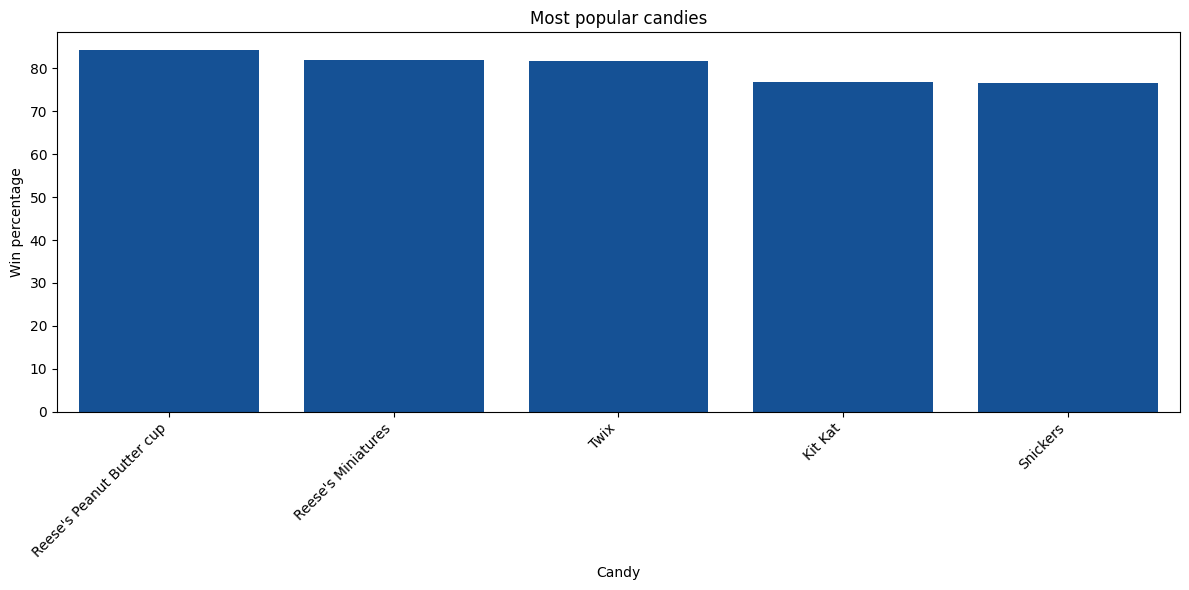

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.nlargest(5, "winpercent"),
    x="competitorname",
    y="winpercent",
    color="#0050AA",
)
plt.xlabel("Candy")
plt.ylabel("Win percentage")
plt.title("Most popular candies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Distribution of winpercent

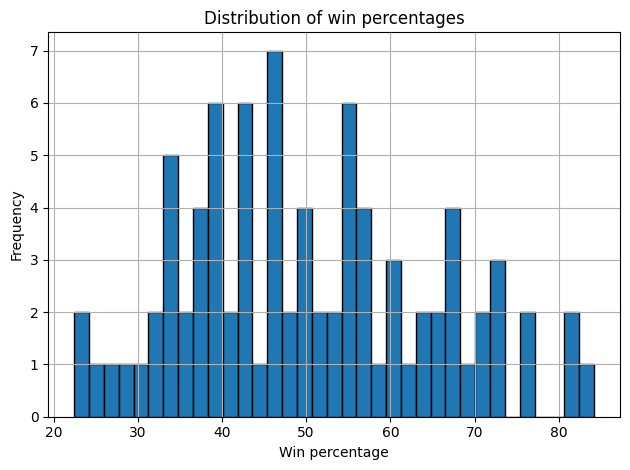

In [8]:
df["winpercent"].hist(bins=35, edgecolor="black")
plt.xlabel("Win percentage")
plt.ylabel("Frequency")
plt.title("Distribution of win percentages")
plt.tight_layout()
plt.show()

### Focus on categorical features

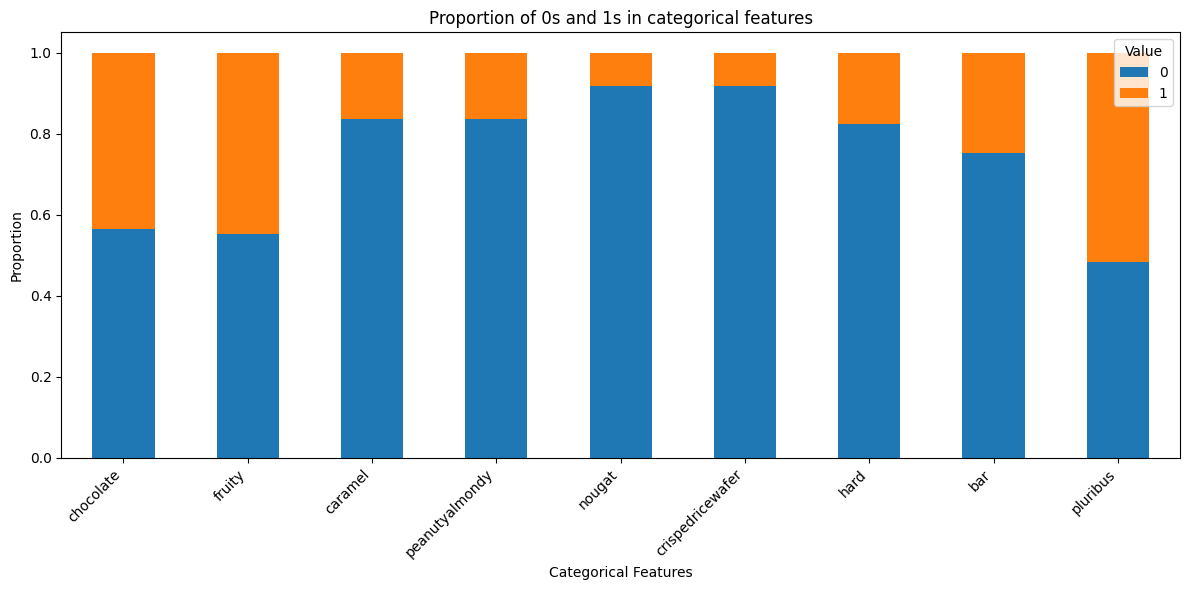

In [9]:
cat_features = df.drop(
    columns=["competitorname", "winpercent", "pricepercent", "sugarpercent"],
)
proportions = cat_features.mean()
prop_plot_data = pd.DataFrame({"0": 1 - proportions, "1": proportions})
plt.figure(figsize=(12, 6))
prop_plot_data.plot(kind="bar", stacked=True, ax=plt.gca())
plt.xlabel("Categorical Features")
plt.ylabel("Proportion")
plt.title("Proportion of 0s and 1s in categorical features")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Value", labels=["0", "1"])
plt.tight_layout()
plt.show()

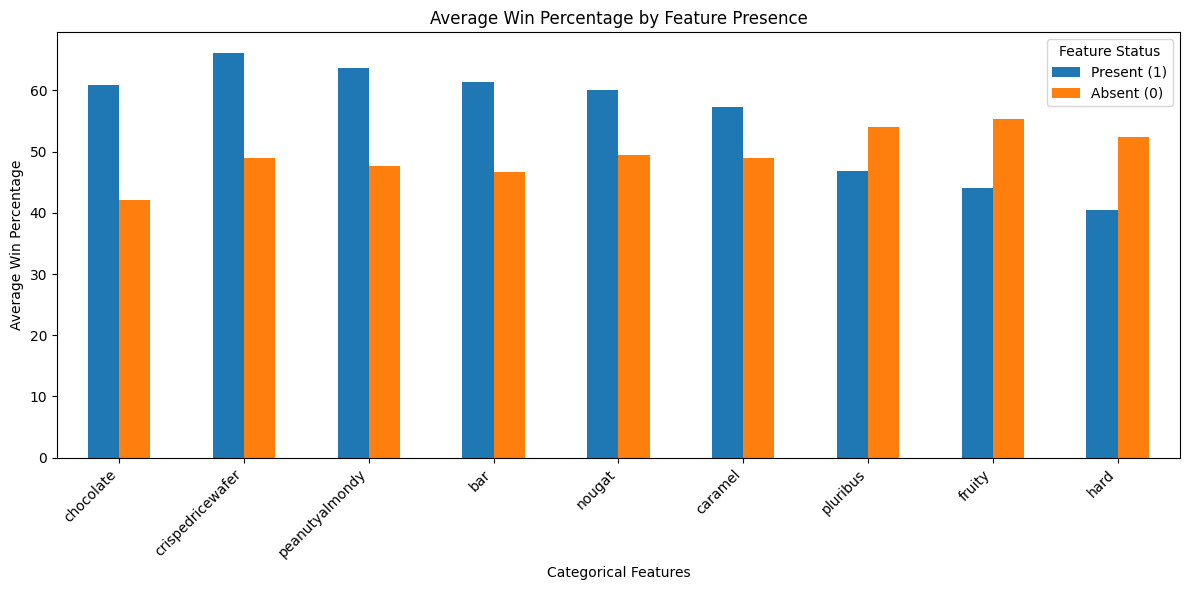

In [10]:
feature_impact = {}

for feature in cat_features.columns:
    present = df[df[feature] == 1]["winpercent"].mean()
    absent = df[df[feature] == 0]["winpercent"].mean()
    diff = present - absent
    feature_impact[feature] = {
        "Present (1)": present,
        "Absent (0)": absent,
        "diff": diff,
    }

impact_df = pd.DataFrame(feature_impact).T.sort_values(by="diff", ascending=False)

plt.figure(figsize=(12, 6))
impact_df.drop(columns=["diff"]).plot(kind="bar", ax=plt.gca())
plt.xlabel("Categorical Features")
plt.ylabel("Average Win Percentage")
plt.title("Average Win Percentage by Feature Presence")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Feature Status")
plt.tight_layout()
plt.show()

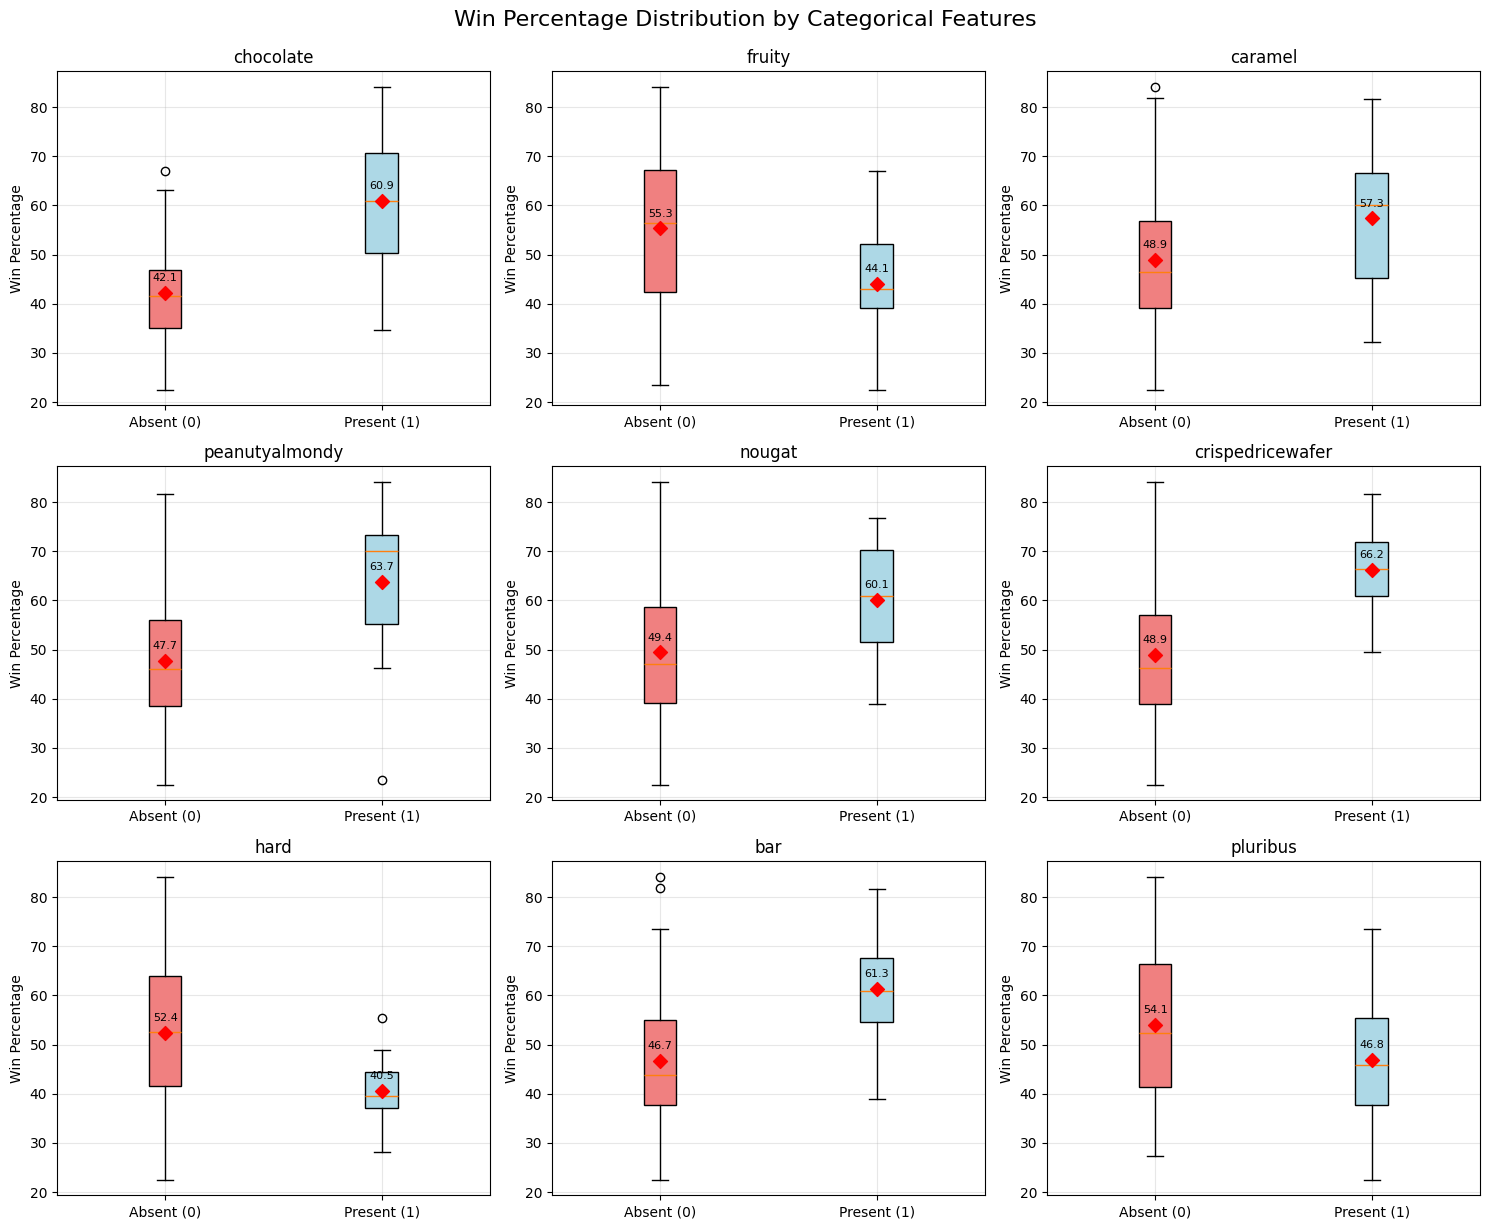

Summary stats for features:

chocolate:
  Present (1): Min=34.7, Max=84.2, Mean=60.9
  Absent (0):  Min=22.4, Max=67.0, Mean=42.1
  Difference: 18.8

fruity:
  Present (1): Min=22.4, Max=67.0, Mean=44.1
  Absent (0):  Min=23.4, Max=84.2, Mean=55.3
  Difference: -11.2

caramel:
  Present (1): Min=32.2, Max=81.6, Mean=57.3
  Absent (0):  Min=22.4, Max=84.2, Mean=48.9
  Difference: 8.4

peanutyalmondy:
  Present (1): Min=23.4, Max=84.2, Mean=63.7
  Absent (0):  Min=22.4, Max=81.6, Mean=47.7
  Difference: 16.0

nougat:
  Present (1): Min=39.0, Max=76.7, Mean=60.1
  Absent (0):  Min=22.4, Max=84.2, Mean=49.4
  Difference: 10.6

crispedricewafer:
  Present (1): Min=49.5, Max=81.6, Mean=66.2
  Absent (0):  Min=22.4, Max=84.2, Mean=48.9
  Difference: 17.3

hard:
  Present (1): Min=28.1, Max=55.4, Mean=40.5
  Absent (0):  Min=22.4, Max=84.2, Mean=52.4
  Difference: -11.9

bar:
  Present (1): Min=39.0, Max=81.6, Mean=61.3
  Absent (0):  Min=22.4, Max=84.2, Mean=46.7
  Difference: 14.6

pluribus:

In [11]:
# Box and whiskers plot for each categorical feature
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(cat_features.columns):
    # Create data for boxplot - only when feature is present (value = 1)
    present_data = df[df[feature] == 1]["winpercent"]
    absent_data = df[df[feature] == 0]["winpercent"]

    # Create boxplot
    box_data = [absent_data, present_data]
    bp = axes[i].boxplot(
        box_data, tick_labels=["Absent (0)", "Present (1)"], patch_artist=True
    )

    # Customize colors
    bp["boxes"][0].set_facecolor("lightcoral")
    bp["boxes"][1].set_facecolor("lightblue")

    # Add mean markers
    axes[i].scatter(
        [1, 2],
        [absent_data.mean(), present_data.mean()],
        color="red",
        marker="D",
        s=50,
        zorder=3,
        label="Mean",
    )

    axes[i].set_title(f"{feature}")
    axes[i].set_ylabel("Win Percentage")
    axes[i].grid(True, alpha=0.3)

    # Add mean values as text
    axes[i].text(
        1,
        absent_data.mean() + 2,
        f"{absent_data.mean():.1f}",
        ha="center",
        va="bottom",
        fontsize=8,
    )
    axes[i].text(
        2,
        present_data.mean() + 2,
        f"{present_data.mean():.1f}",
        ha="center",
        va="bottom",
        fontsize=8,
    )

plt.tight_layout()
plt.suptitle("Win Percentage Distribution by Categorical Features", y=1.02, fontsize=16)
plt.show()

print("Summary stats for features:")
for feature in cat_features.columns:
    present = df[df[feature] == 1]["winpercent"]
    absent = df[df[feature] == 0]["winpercent"]

    print(f"\n{feature}:")
    print(
        f"  Present (1): Min={present.min():.1f}, Max={present.max():.1f}, Mean={present.mean():.1f}"
    )
    print(
        f"  Absent (0):  Min={absent.min():.1f}, Max={absent.max():.1f}, Mean={absent.mean():.1f}"
    )
    print(f"  Difference: {present.mean() - absent.mean():.1f}")

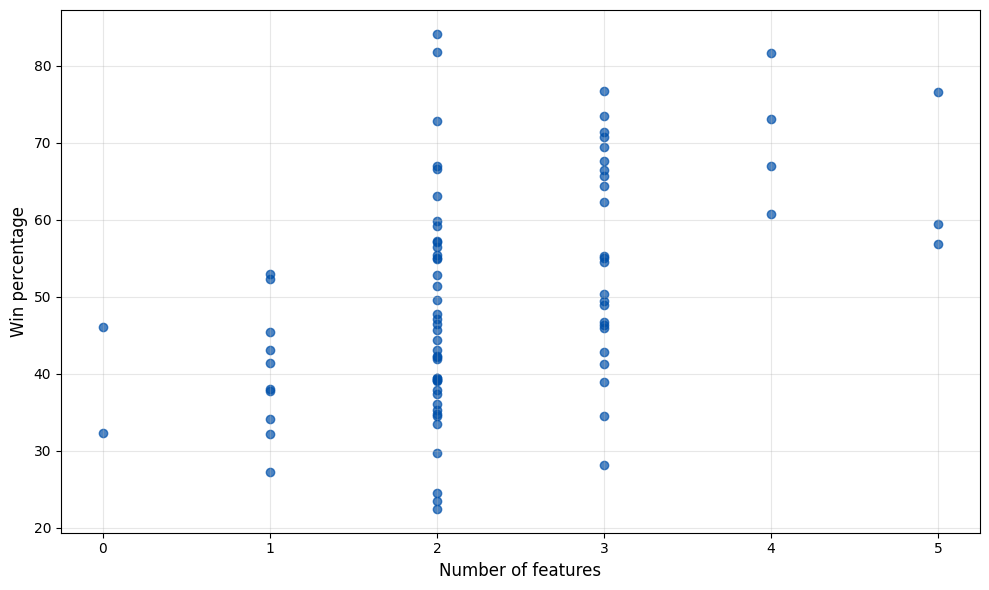

In [23]:
feature_count = cat_features.sum(axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(
    feature_count,
    df["winpercent"],
    alpha=0.7,
    color="#0050AA",
)
plt.xlabel("Number of features", fontsize=12)
plt.ylabel("Win percentage", fontsize=12)
# plt.title("Relationship between feature count and win percentage")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Correlations

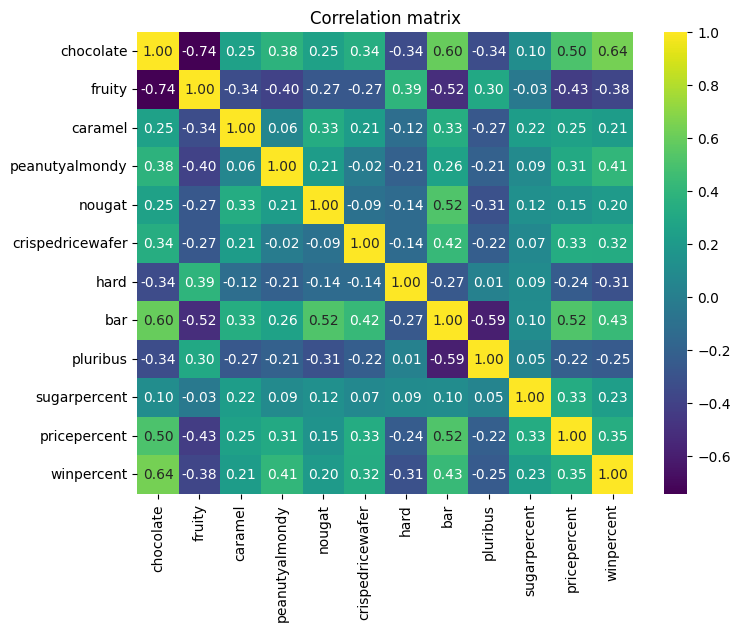

In [13]:
corr_mat = df.drop("competitorname", axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_mat,
    annot=True,
    fmt=".2f",
    cmap="viridis",
)
plt.title("Correlation matrix")
plt.show()

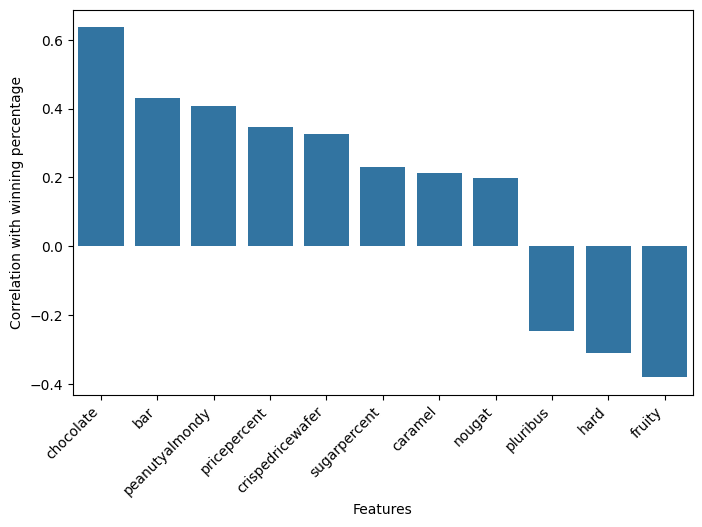

In [14]:
corr_with_winpercent = (
    corr_mat["winpercent"].drop("winpercent").sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_winpercent.index, y=corr_with_winpercent.values)
plt.xlabel("Features")
plt.ylabel("Correlation with winning percentage")
plt.xticks(rotation=45, ha="right")
plt.show()

### Sugar percentile: scatter + lowess

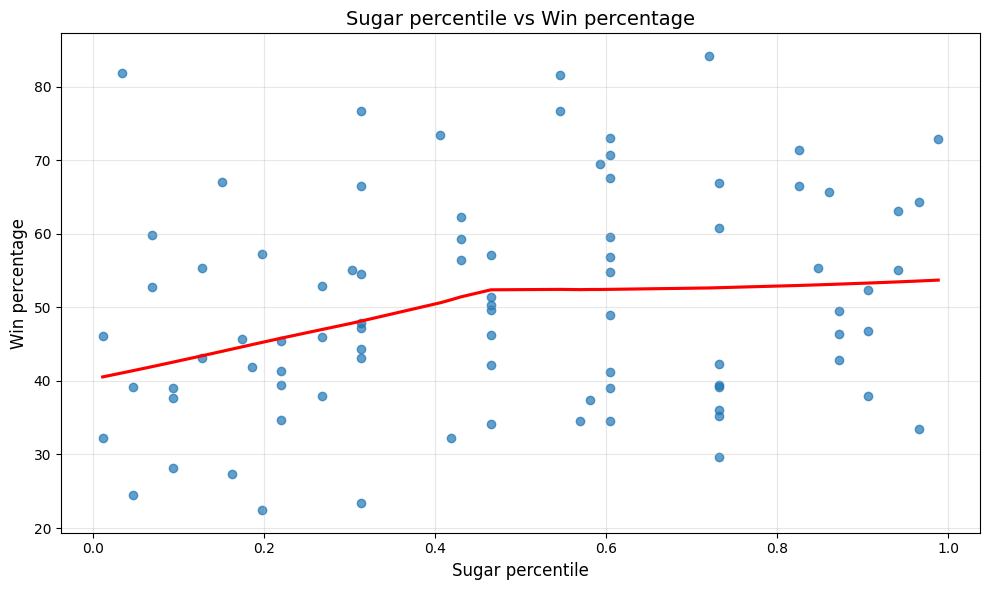

In [22]:
plt.figure(figsize=(10, 6))

sns.regplot(
    data=df,
    x="sugarpercent",
    y="winpercent",
    lowess=True,
    scatter_kws={"alpha": 0.7},
    line_kws={"color": "red"},
)
plt.xlabel("Sugar percentile", fontsize=12)
plt.ylabel("Win percentage", fontsize=12)
plt.title("Sugar percentile vs Win percentage", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Egy ilyet csinálni regresszióban is -> négyzetes tag és max számítás

### Fruity and chocolate

- It seems strange to have a fruity flavored chocolate or at least it might not be that popular
- However, just based on the regression coefficients that's what we should have
- Check whether these features do appear together in the data

In [16]:
df[(df["chocolate"] == 1) & (df["fruity"] == 1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651


Since they only appears once together, let's treat these features as exclusive

In [21]:
# same thing with peanuty/almondy and crispedricewafer
df[(df["peanutyalmondy"] == 1) & (df["crispedricewafer"] == 1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
65,Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251


In [23]:
# nougaty and caramel
df[(df["nougat"] == 1) & (df["caramel"] == 1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
37,Milky Way Midnight,1,0,1,0,1,0,0,1,0,0.732,0.441,60.800701
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
